# Data Preprocessing


In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def scale_features(df, scaling_method='standard', target_column=None):
    """
    Scale all features except the target column.
    
    Parameters:
    - df: DataFrame, the input dataset.
    - scaling_method: str, 'standard' for Standard Scaling or 'minmax' for Min-Max Scaling.
    - target_column: str, name of the target column (optional).
    
    Returns:
    - df_scaled: DataFrame, DataFrame with scaled features.
    """
    if scaling_method == 'standard':
        scaler = StandardScaler()
    elif scaling_method == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scaling method. Choose 'standard' or 'minmax'.")

    # Separate features and target variable
    if target_column:
        features = df.drop(columns=[target_column])
        target = df[target_column]
    else:
        features = df.copy()
        target = None

    # Scale all features
    features_scaled = scaler.fit_transform(features)
    df_scaled = pd.DataFrame(features_scaled, columns=features.columns, index=df.index)

    # Add the target column back if it was provided
    if target_column:
        df_scaled[target_column] = target

    return df_scaled

## Dataset 1

In [36]:

def Preprocess_DF1():

    train_file_path = "Adult/adult.data"
    df  = pd.read_csv(train_file_path)
    df.drop_duplicates(inplace=True)
    test_file_path = "Adult/adult.test"
    df_test = pd.read_csv(test_file_path, skiprows=1)
    df_test.drop_duplicates(inplace=True)
    # Define the column headers
    column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                    'hours-per-week', 'native-country', 'income']

    # Assign column headers to the training DataFrame
    df.columns = column_headers

    # Assign column headers to the test DataFrame
    df_test.columns = column_headers

    df_combined = pd.concat([df, df_test], ignore_index=True)
    object_columns = df_combined.select_dtypes(include=['object']).columns
    for column in object_columns:
        df_combined[column] = df_combined[column].astype('category')

    df_combined['income'] = df_combined['income'].str.replace('.', '', regex=False)

    
    feature_col = "income"

    label_encoder = LabelEncoder()
    df_combined[feature_col] = label_encoder.fit_transform(df_combined[feature_col])

    for col in df_combined.select_dtypes(include=['category']).columns:
        if col != feature_col and df_combined[col].nunique() == 2:

            df_combined[col] = label_encoder.fit_transform(df_combined[col])

    df_combined.dtypes

    df_combined = pd.get_dummies(df_combined, drop_first=True)
    bool_columns = df_combined.select_dtypes(include=['bool']).columns.tolist()
    int_columns = df_combined.select_dtypes(include=['int64']).columns.tolist()

    df_combined[bool_columns] = df_combined[bool_columns].astype('int64')
    df_combined.drop_duplicates(inplace=True)

    df_combined[int_columns] = df_combined[int_columns].astype('float32')

    df_combined = scale_features(df_combined, 'standard', 'income')
    return df_combined

    

In [37]:
df = Preprocess_DF1()
print(f'null values in df: {df.isnull().sum().sum()}\ngot df with shape: {df.shape}\nduplicated rows: {df.duplicated().sum()}')

null values in df: 0
got df with shape: (48788, 101)
duplicated rows: 0


## Second Dataset

In [38]:
def Preprocess_DF2():
    third_df_file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
    df_third_dataset = pd.read_csv(third_df_file_path)
    df = df_third_dataset.copy(deep=True)
    

    df.drop('customerID', axis=1, inplace=True)
   


    df.drop_duplicates(inplace=True)


    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
    df['TotalCharges'] = df['TotalCharges'].astype('float64')

   



    # print(f'Null values in each column:\n{df.isna().sum()}')
    # print(f"duplicated rows: {df.duplicated().sum()}")



    # Convert all object types into category types
    object_columns = df.select_dtypes(include=['object']).columns
    for column in object_columns:
        df[column] = df[column].astype('category')

  


    label_encoder = LabelEncoder()

    # Label encode the target column 'Churn' in the third dataset
    df['Churn'] = label_encoder.fit_transform(df['Churn'])

    



    # for column in df.columns:
    #     print(f"Unique values and counts for {column}:")
    #     print(df[column].value_counts())
    #     print("\n")



    feature_col = 'Churn'
    for col in df.select_dtypes(include=['category']).columns:
        if col != feature_col and df[col].nunique() == 2:

            df[col] = label_encoder.fit_transform(df[col])

   

    df = pd.get_dummies(df).astype('float64')



    # for column in df.columns:
    #     print(f"Unique values and counts for {column}:")
    #     print(df[column].value_counts())
    #     print("\n")

    df['Churn'] = df['Churn'].astype('int64')

    df = scale_features(df, 'standard', 'Churn')
    return df

    


In [39]:
df =Preprocess_DF2()
print(f'null values in df: {df.isnull().sum().sum()}\ngot df with shape: {df.shape}\nduplicated rows: {df.duplicated().sum()}')

null values in df: 0
got df with shape: (7021, 41)
duplicated rows: 0


/tmp/ipykernel_284414/2529241732.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


## Third Dataset

In [40]:
def Preprocess_DF3():

    third_df_file_path = "creditcard.csv"
    df = pd.read_csv(third_df_file_path)

    
    df.drop_duplicates(inplace=True)

    df = scale_features(df, 'standard', 'Class')
    return df





In [41]:
df = Preprocess_DF3()
print(f'null values in df: {df.isnull().sum().sum()}\ngot df with shape: {df.shape}\nduplicated rows: {df.duplicated().sum()}')

null values in df: 0
got df with shape: (283726, 31)
duplicated rows: 0


# LR , Bagging , Stacking

## Accuracy Metrics

In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix, log_loss

def calculate_metrics(y_test, y_pred):
    """
    Calculate and print the accuracy, sensitivity, specificity, precision, F1-score, AUROC, and AUPR for the given model and test data.
    
    Parameters:
    - model: trained logistic regression model.
    - X_test: DataFrame, the test set features.
    - y_test: Series, the test set target.
    
    Returns:
    - metrics: dict, containing accuracy, loss, sensitivity, specificity, precision, F1-score, AUROC, and AUPR.
    """
    
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    loss = log_loss(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_pred)
    aupr = average_precision_score(y_test, y_pred)
    
    # # Print metrics
    # print(f"Accuracy: {accuracy}")
    # print(f"Loss: {loss}")
    # print(f"Sensitivity: {sensitivity}")
    # print(f"Specificity: {specificity}")
    # print(f"Precision: {precision}")
    # print(f"F1-score: {f1}")
    # print(f"AUROC: {auroc}")
    # print(f"AUPR: {aupr}")
    
    metrics = {
        'accuracy': accuracy,
        'loss': loss,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'precision': precision,
        'f1_score': f1,
        'auroc': auroc,
        'aupr': aupr
    }
    
    return metrics

# Example usage
# Assuming you have a trained model and test data
# model, X_test, y_test = ... (from your previous code)
# metrics = calculate_metrics(model, X_test, y_test)

## Logistic Regression

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization_strength=0.01):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization_strength = regularization_strength  # L2 regularization strength
    
    def sigmoid(self, z):
        # Clip values to avoid overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        X = np.array(X)
        y = np.array(y)
        
        for i in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            dw = (1 / self.m) * np.dot(X.T, (y_predicted - y)) + (self.regularization_strength / self.m) * self.weights
            db = (1 / self.m) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
    
    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    def compute_loss(self, X, y):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        # Clip predicted probabilities to avoid log(0)
        y_predicted = np.clip(y_predicted, 1e-15, 1 - 1e-15)
        loss = -1 / self.m * (np.dot(y, np.log(y_predicted)) + np.dot((1 - y), np.log(1 - y_predicted)))
        return loss





## Bagging

In [44]:
def bagging_logistic_regression(df, target_column, n_estimators=9, learning_rate=0.01, l2_penalty=0.01, random_state=42, test_size=0.2,num_iterations=1000):
    """
    Perform bagging with logistic regression on the given dataset.
    
    Parameters:
    - df: DataFrame, the input dataset.
    - target_column: str, the name of the target column.
    - n_estimators: int, the number of bootstrap samples and models.
    - learning_rate: float, the learning rate for logistic regression.
    - l2_penalty: float, the L2 regularization strength.
    
    Returns:
    - models: list, trained logistic regression models.
    - X_test: DataFrame, the test set features.
    - y_test: Series, the test set target.
    - y_pred: ndarray, aggregated predictions from all models.
    - accuracies: list, accuracies of each model.
    - losses: list, losses of each model.
    """
    # Split the dataset into features and target
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    models = []
    predictions = []
    accuracies = []
    losses = []
    metric_list = []
    
    for i in range(n_estimators):
        # Generate a bootstrap sample
        X_resampled, y_resampled = resample(X_train, y_train, replace=True, random_state=i)
        
        # Create and train a logistic regression model
        model = LogisticRegression(learning_rate=learning_rate, num_iterations=num_iterations, regularization_strength=l2_penalty)
        model.fit(X_resampled, y_resampled)
        
        # Store the model
        models.append(model)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        predictions.append(y_pred)

        #Calculate metrics
        metrics = calculate_metrics(y_test, y_pred)
        metric_list.append(metrics)
        
        # Calculate accuracy and loss
        accuracy = model.accuracy(y_test, y_pred)
        loss = model.compute_loss(X_test, y_test)
        
        accuracies.append(accuracy)
        losses.append(loss)
        
        # Print accuracy and loss
        # print(f"Model {i+1} - Accuracy: {accuracy}, Loss: {loss}")
    
    # Aggregate predictions by majority vote
    predictions = np.array(predictions)
    y_pred_final = np.round(np.mean(predictions, axis=0)).astype(int)
    
    # Calculate and print the final accuracy after majority voting
    # final_accuracy = accuracy_score(y_test, y_pred_final)
    # print(f"Final Accuracy after Majority Voting: {final_accuracy}")
    
    # # Evaluate the model
    # print(confusion_matrix(y_test, y_pred_final))
    # print(classification_report(y_test, y_pred_final))
    
    return models, X_test, y_test, y_pred_final,metric_list

## Violine Plot

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

def generate_violin_plots(df, target_column, learning_rate=0.01, l2_penalty=0.01, n_estimators=9, num_iterations=1000):
    """
    Generate separate violin plots for each evaluation metric of the bagging models.
    
    Parameters:
    - df: DataFrame, the input dataset.
    - target_column: str, the name of the target column.
    - learning_rate: float, the learning rate for logistic regression.
    - l2_penalty: float, the L2 regularization strength.
    - n_estimators: int, the number of bootstrap samples and models.
    - num_iterations: int, the number of iterations for logistic regression.
    """
    # Perform bagging logistic regression
    models, X_test, y_test, y_pred_final, metrics_list = bagging_logistic_regression(df, target_column, n_estimators, learning_rate, l2_penalty, num_iterations=num_iterations)
    
    # Convert metrics to DataFrame for plotting
    metrics_df = pd.DataFrame(metrics_list)
    
    # Generate separate violin plots for each metric
    metrics = ['accuracy', 'sensitivity', 'specificity', 'precision', 'f1_score', 'auroc', 'aupr']
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        sns.violinplot(data=metrics_df[[metric]])
        plt.title(f'Violin Plot of {metric.capitalize()} for Bagging Logistic Regression Models')
        plt.xlabel(metric.capitalize())
        plt.savefig(f"Figures/{target_column}_Violin_plot_{metric}.png")
        plt.ylabel('Values')
        plt.show()
       
        plt.close()

## Stacking

In [46]:
def stacking_ensemble(df, target_column, learning_rate=0.01, num_iterations=1000, random_state=42,l2_penalty=0.01):
    """
    Implement stacking ensemble with logistic regression models.
    
    Parameters:
    - df: DataFrame, the input dataset.
    - target_column: str, the name of the target column.
    - learning_rate: float, the learning rate for logistic regression.
    - num_iterations: int, the number of iterations for logistic regression.
    - random_state: int, the random state for reproducibility.
    
    Returns:
    - X_test: DataFrame, the test set features.
    - y_test: Series, the test set target.
    - y_pred_final: ndarray, predictions from the stacking ensemble.
    """
    # Split the dataset into features and target
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Further split the training set into training and validation sets
    X_train_main, X_val, y_train_main, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)
    
    base_learners = []
    meta_features = np.zeros((X_val.shape[0], 9))
    
    for i in range(9):
        # Generate a bootstrap sample
        X_resampled, y_resampled = resample(X_train_main, y_train_main, replace=True, random_state=i)
        
        # Create and train a logistic regression model
        model = LogisticRegression(learning_rate=learning_rate, num_iterations=num_iterations, regularization_strength=l2_penalty)
        model.fit(X_resampled, y_resampled)
        
        # Store the base learner
        base_learners.append(model)
        
        # Generate meta features using the validation set
        meta_features[:, i] = model.predict(X_val)
    
    # Train the meta classifier
    meta_classifier = LogisticRegression(learning_rate=learning_rate, num_iterations=num_iterations, regularization_strength=l2_penalty)
    meta_classifier.fit(meta_features, y_val)
    
    # Generate meta features for the test set
    meta_features_test = np.zeros((X_test.shape[0], 9))
    for i, model in enumerate(base_learners):
        meta_features_test[:, i] = model.predict(X_test)
    
    # Make final predictions using the meta classifier
    y_pred_final = meta_classifier.predict(meta_features_test)
    
    return X_test, y_test, y_pred_final



## Evaluate Metrics

In [47]:
import numpy as np
import pandas as pd

def calculate_average_and_std(metrics_list):
    """
    Calculate the average and standard deviation of each metric from the output of bagging logistic regression.
    
    Parameters:
    - metrics_list: list of dicts, each dict contains the metrics for one of the bagging models.
    
    Returns:
    - metrics_avg_std: dict, containing the average and standard deviation for each metric.
    """
    # Convert the list of metrics dictionaries to a DataFrame
    metrics_df = pd.DataFrame(metrics_list)
    
    # Calculate the average and standard deviation for each metric
    metrics_avg = metrics_df.mean()
    metrics_std = metrics_df.std()
    
    # Combine the average and standard deviation into a single dictionary
    metrics_avg_std = {}
    for metric in metrics_df.columns:
        metrics_avg_std[metric] = {
            'average': metrics_avg[metric],
            'std_dev': metrics_std[metric]
        }
    
    return metrics_avg_std


### Function to evaluate metrics

In [48]:
def evaluate_models(df, target_column, learning_rate_lr=0.01, l2_penalty_for_lr=0.01, iterations_lr=1000, learning_rate_bagging=0.01, l2_penalty_bagging=0.01, n_estimators=9, iterations_bagging=1000, test_size=0.2, random_state=42, learning_rate_stack=0.01, l2_penalty_stack=0.01, iterations_stack=1000):
    """
    Train and evaluate single logistic regression, bagging ensemble, and stacking ensemble on the given dataset.
    
    Parameters:
    - df: DataFrame, the input dataset.
    - target_column: str, the name of the target column.
    - learning_rate_lr: float, the learning rate for single logistic regression.
    - l2_penalty_for_lr: float, the L2 regularization strength for single logistic regression.
    - iterations_lr: int, the number of iterations for single logistic regression.
    - learning_rate_bagging: float, the learning rate for bagging logistic regression.
    - l2_penalty_bagging: float, the L2 regularization strength for bagging logistic regression.
    - n_estimators: int, the number of bootstrap samples and models for bagging.
    - iterations_bagging: int, the number of iterations for bagging logistic regression.
    - test_size: float, the proportion of the dataset to include in the test split.
    - random_state: int, the random state for reproducibility.
    - learning_rate_stack: float, the learning rate for stacking logistic regression.
    - l2_penalty_stack: float, the L2 regularization strength for stacking logistic regression.
    - iterations_stack: int, the number of iterations for stacking logistic regression.
    
    Returns:
    - metrics_single: dict, metrics for the single logistic regression model.
    - metrics_bagging: dict, metrics for the bagging ensemble of logistic regression models.
    - metrics_stacking: dict, metrics for the stacking ensemble of logistic regression models.
    """
    # Split the dataset into features and target
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Train and evaluate a single logistic regression model
    # print("Metrics for Single Logistic Regression Model:")
    single_model = LogisticRegression(learning_rate=learning_rate_lr, num_iterations=iterations_lr, regularization_strength=l2_penalty_for_lr)
    single_model.fit(X_train, y_train)
    y_pred_single = single_model.predict(X_test)
    metrics_single = calculate_metrics(y_test, y_pred_single)
    
    # Train and evaluate a bagging ensemble of logistic regression models
    # print("\nMetrics for Bagging Logistic Regression Model:")
    models, X_test, y_test, y_pred_final,metrics = bagging_logistic_regression(df, target_column, n_estimators=n_estimators, learning_rate=learning_rate_bagging, l2_penalty=l2_penalty_bagging, num_iterations=iterations_bagging)
    metrics_bagging = calculate_metrics(y_test, y_pred_final)
    metrics_bagging_avg_std = calculate_average_and_std(metrics)
    
    
    # Train and evaluate a stacking ensemble of logistic regression models
    # print("\nMetrics for Stacking Logistic Regression Model:")
    X_test, y_test, y_pred_final = stacking_ensemble(df, target_column, learning_rate=learning_rate_stack, num_iterations=iterations_stack, random_state=random_state)
    metrics_stacking = calculate_metrics(y_test, y_pred_final)
    
    return metrics_single, metrics_bagging, metrics_stacking, metrics_bagging_avg_std



### Evaluation of each dataset

In [49]:
# # Example usage
# # Example usage
# metrics_single, metrics_bagging, metrics_stacking, metrics_bagging_std = evaluate_models(df_first_dataset_final, target_column='income', learning_rate_lr=0.01, l2_penalty_for_lr=0.01, iterations_lr=1000, learning_rate_bagging=0.01, l2_penalty_bagging=0.01, n_estimators=9, iterations_bagging=1000, test_size=0.2, random_state=42, learning_rate_stack=0.01, l2_penalty_stack=0.01, iterations_stack=1000)

# print("Metrics for Single Logistic Regression Model:")
# print(metrics_single)
# print("\nMetrics for Bagging Logistic Regression Model:")
# print(metrics_bagging)
# print("\nMetrics for Stacking Logistic Regression Model:")
# print(metrics_stacking)
# print("\nMetrics for Bagging Logistic Regression Model Average and Standard Deviation:")
# print(metrics_bagging_std)

In [50]:
# metrics_single,metrics_bagging,metrics_stacking,metrics_bagging_std = evaluate_models(df_second_dataset_final, target_column='Churn', learning_rate_lr=0.5, l2_penalty_for_lr=0.0005, iterations_lr = 1000,learning_rate_bagging=0.5, l2_penalty_bagging=0.0005, n_estimators=9,iterations_bagging=1000,test_size=0.2, random_state=42,learning_rate_stack=0.5, l2_penalty_stack=0.0005,iterations_stack=1000)


# print("Metrics for Single Logistic Regression Model:")
# print(metrics_single)
# print("\nMetrics for Bagging Logistic Regression Model:")
# print(metrics_bagging)
# print("\nMetrics for Stacking Logistic Regression Model:")
# print(metrics_stacking)
# print("\nMetrics for Bagging Logistic Regression Model Average and Standard Deviation:")
# print(metrics_bagging_std)


In [51]:
# # Separate positive and negative samples
# positive_samples = df_third_dataset_final[df_third_dataset_final['Class'] == 1]
# negative_samples = df_third_dataset_final[df_third_dataset_final['Class'] == 0]

# # Randomly select 20,000 negative samples
# negative_samples_selected = negative_samples.sample(n=20000, random_state=42)

# # Combine the positive samples with the selected negative samples
# df_sampled = pd.concat([positive_samples, negative_samples_selected])

# # Shuffle the combined dataframe
# df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

# df_sampled.shape

In [52]:
# metrics_single,metrics_bagging,metrics_stacking,metrics_bagging_std = evaluate_models(df_sampled, target_column='Class', learning_rate_lr=0.5, l2_penalty_for_lr=0.0005, iterations_lr = 1000,learning_rate_bagging=0.5, l2_penalty_bagging=0.0005, n_estimators=9,iterations_bagging=1000,test_size=0.2, random_state=42,learning_rate_stack=0.5, l2_penalty_stack=0.0005,iterations_stack=1000)

# print("Metrics for Single Logistic Regression Model:")
# print(metrics_single)
# print("\nMetrics for Bagging Logistic Regression Model:")
# print(metrics_bagging)
# print("\nMetrics for Stacking Logistic Regression Model:")
# print(metrics_stacking)
# print("\nMetrics for Bagging Logistic Regression Model Average and Standard Deviation:")
# print(metrics_bagging_std)


## Generate Violin Plot For each Dataset

In [53]:
# generate_violin_plots(df_first_dataset_final, target_column='income', learning_rate=0.01, l2_penalty=0.01, n_estimators=9, num_iterations=1000)

In [54]:
# generate_violin_plots(df_second_dataset_final, target_column='Churn', learning_rate=0.01, l2_penalty=0.01, n_estimators=9, num_iterations=1000)

In [55]:
# generate_violin_plots(df_sampled, target_column='Class', learning_rate=0.5, l2_penalty=0.0005, n_estimators=9, num_iterations=1000)

## Accuracy Vs Learning Rate Curve

In [56]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

def plot_accuracy_vs_learning_rate(dataset, feature_name, learning_rates):
    """
    Plots the accuracy vs learning rate for Logistic Regression using the custom class.

    Parameters:
    - dataset: DataFrame, the input dataset.
    - feature_name: str, the name of the target feature.
    - learning_rates: list, a list of learning rates to evaluate.
    """

    # Extract features and target variable
    X = dataset.drop(columns=[feature_name])
    y = dataset[feature_name]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracies = []

    for lr in learning_rates:
        # Initialize the custom logistic regression model
        custom_log_reg = LogisticRegression(learning_rate=lr, num_iterations=1000)

        # Train the model
        custom_log_reg.fit(X_train, y_train)

        # Make predictions
        y_pred_custom = custom_log_reg.predict(X_test)

        # Calculate accuracy
        accuracy_custom = custom_log_reg.accuracy(y_test, y_pred_custom)
        accuracies.append(accuracy_custom)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(learning_rates, accuracies, marker='o')
    plt.title('Accuracy vs Learning Rate')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()



# Runner for all datasets


In [59]:
def Generate_All_Outputs(df_name,learning_rate_lr=0.01, l2_penalty_for_lr=0.01, iterations_lr=1000, learning_rate_bagging=0.01, l2_penalty_bagging=0.01, n_estimators=9, iterations_bagging=1000, test_size=0.2, random_state=42, learning_rate_stack=0.01, l2_penalty_stack=0.01, iterations_stack=1000):
    if(df_name == 'income'):
        df = Preprocess_DF1()
    elif(df_name == 'Churn'):
        df = Preprocess_DF2()
    elif(df_name == 'Class'):
        df = Preprocess_DF3()
        # Separate positive and negative samples
        positive_samples = df[df['Class'] == 1]
        negative_samples = df[df['Class'] == 0]

        # Randomly select 20,000 negative samples
        negative_samples_selected = negative_samples.sample(n=20000, random_state=42)

        # Combine the positive samples with the selected negative samples
        df_sampled = pd.concat([positive_samples, negative_samples_selected])

        # Shuffle the combined dataframe
        df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)
        df = df_sampled.copy(deep=True)
        

    

    metrics_single, metrics_bagging, metrics_stacking, metrics_bagging_std = evaluate_models(df, target_column=df_name, learning_rate_lr=learning_rate_lr, l2_penalty_for_lr=l2_penalty_for_lr, iterations_lr=iterations_lr, learning_rate_bagging=learning_rate_bagging, l2_penalty_bagging=l2_penalty_bagging, n_estimators=n_estimators, iterations_bagging=iterations_bagging, test_size=test_size, random_state=random_state, learning_rate_stack=learning_rate_stack, l2_penalty_stack=l2_penalty_stack, iterations_stack=iterations_stack)

    print("Metrics for Single Logistic Regression Model:")
    print(metrics_single)
    print("\nMetrics for Bagging Logistic Regression Model:")
    print(metrics_bagging)
    print("\nMetrics for Stacking Logistic Regression Model:")
    print(metrics_stacking)
    print("\nMetrics for Bagging Logistic Regression Model Average and Standard Deviation:")
    print(metrics_bagging_std)


    generate_violin_plots(df, target_column=df_name, learning_rate=learning_rate_bagging, l2_penalty=l2_penalty_bagging, n_estimators=n_estimators, num_iterations=iterations_bagging)

    

/tmp/ipykernel_284414/2529241732.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


Metrics for Single Logistic Regression Model:
{'accuracy': 0.7921708185053381, 'loss': 7.490922981937515, 'sensitivity': 0.5397727272727273, 'specificity': 0.8765432098765432, 'precision': 0.59375, 'f1_score': 0.5654761904761905, 'auroc': 0.7081579685746353, 'aupr': 0.43579254792138467}

Metrics for Bagging Logistic Regression Model:
{'accuracy': 0.798576512455516, 'loss': 7.260038369480536, 'sensitivity': 0.5369318181818182, 'specificity': 0.886039886039886, 'precision': 0.6116504854368932, 'f1_score': 0.5718608169440242, 'auroc': 0.7114858521108522, 'aupr': 0.4444288421128676}

Metrics for Stacking Logistic Regression Model:
{'accuracy': 0.797864768683274, 'loss': 7.28569221530909, 'sensitivity': 0.5170454545454546, 'specificity': 0.8917378917378918, 'precision': 0.6148648648648649, 'f1_score': 0.5617283950617284, 'auroc': 0.7043916731416732, 'aupr': 0.43890952481922235}

Metrics for Bagging Logistic Regression Model Average and Standard Deviation:
{'accuracy': {'average': 0.79762752

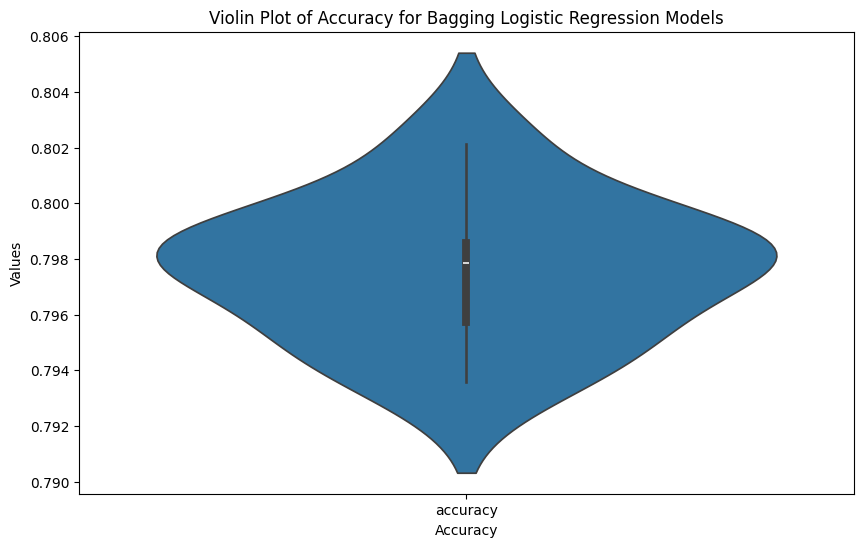

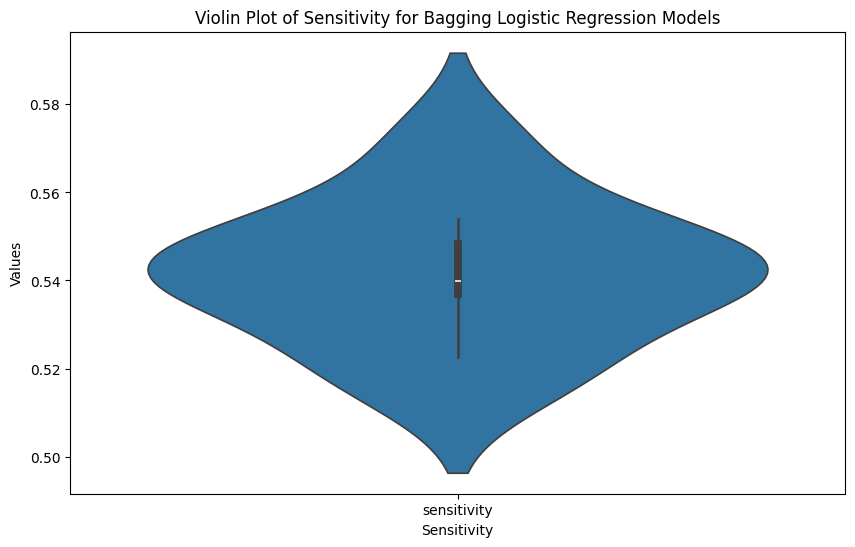

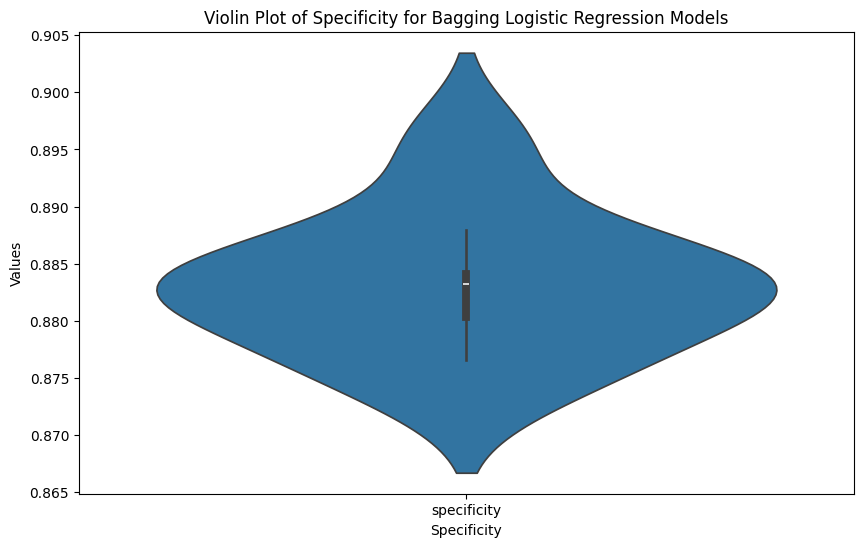

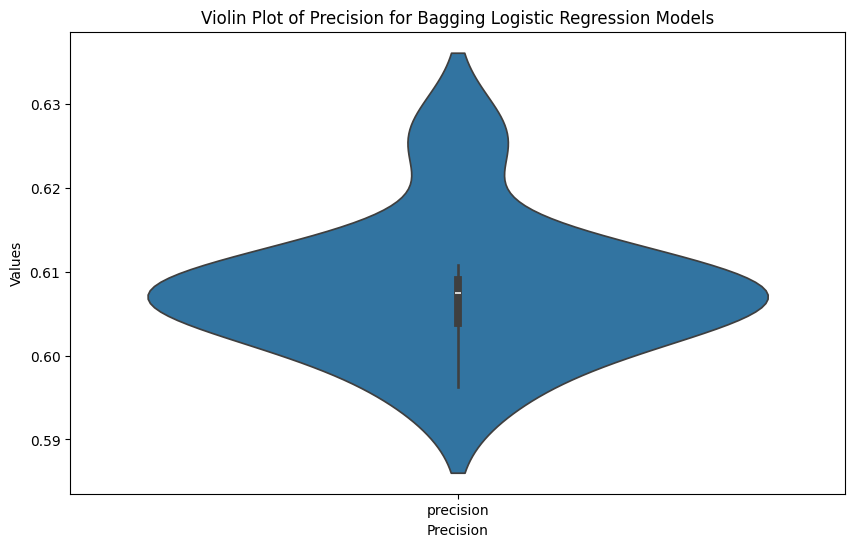

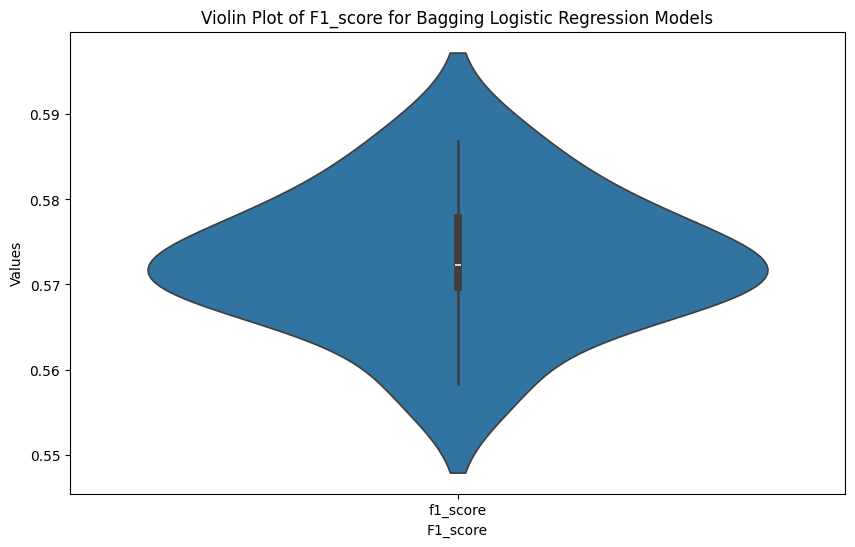

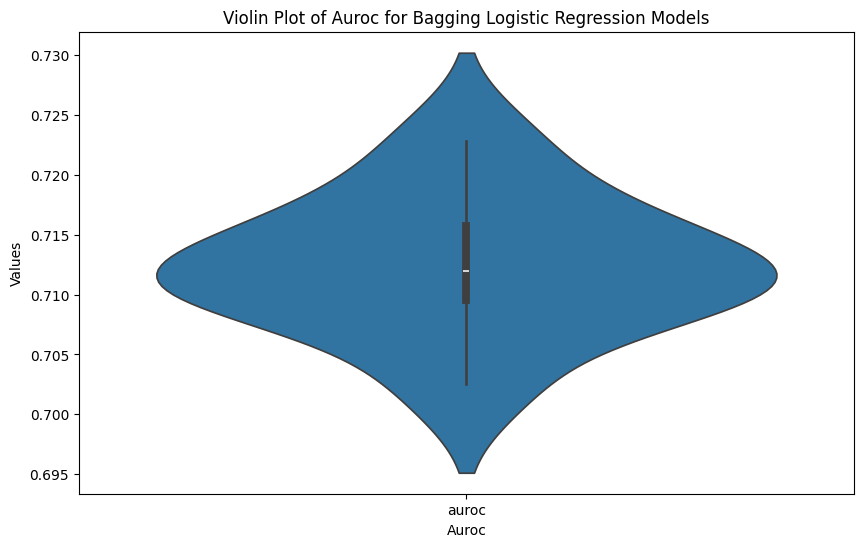

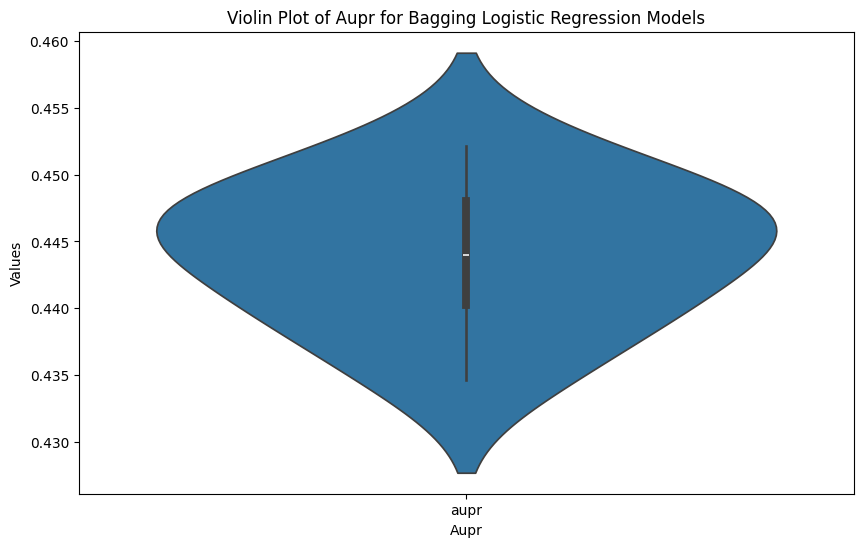

In [65]:
# df_name = "income"
df_name = "Churn"
# df_name = "Class"
Generate_All_Outputs(df_name,learning_rate_lr=0.5, l2_penalty_for_lr=0.0005, iterations_lr = 1000,learning_rate_bagging=0.5, l2_penalty_bagging=0.0005, n_estimators=9,iterations_bagging=1000,test_size=0.2, random_state=42,learning_rate_stack=0.5, l2_penalty_stack=0.0005,iterations_stack=1000)